In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path('architectural-styles-dataset')
fns = get_image_files(path)

In [3]:
buildings = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
buildings = buildings.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = buildings.dataloaders(path)

In [5]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], wd=1e-1)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.260629,1.600488,0.539070,0.460930,03:19


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.422208,1.223605,0.624629,0.375371,04:16
1,1.231241,1.136995,0.669139,0.330861,04:16
2,1.017101,1.123536,0.680020,0.319980,04:15
3,0.839055,1.125301,0.679525,0.320475,04:15
4,0.658240,1.077639,0.713650,0.286350,04:16
5,0.488794,1.090593,0.721563,0.278437,04:15
6,0.349257,1.055248,0.733432,0.266568,04:16
7,0.224203,1.043527,0.744807,0.255193,04:15
8,0.156570,1.040436,0.747280,0.252720,04:15
9,0.129919,1.041841,0.750247,0.249753,04:16


In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=3)

[('International style', 'Bauhaus architecture', 21),
 ('American Foursquare architecture', 'American craftsman style', 15),
 ('American Foursquare architecture', 'Queen Anne architecture', 11),
 ('Byzantine architecture', 'Russian Revival architecture', 11),
 ('International style', 'Postmodern architecture', 11),
 ('American craftsman style', 'Queen Anne architecture', 10),
 ('Edwardian architecture', 'Queen Anne architecture', 10),
 ('Bauhaus architecture', 'International style', 8),
 ('Beaux-Arts architecture', 'Chicago school architecture', 8),
 ('Postmodern architecture', 'International style', 8),
 ('Greek Revival architecture', 'Queen Anne architecture', 7),
 ('Palladian architecture', 'Georgian architecture', 7),
 ('Postmodern architecture', 'Deconstructivism', 7),
 ('American craftsman style', 'Tudor Revival architecture', 6),
 ('Art Deco architecture', 'Art Nouveau architecture', 6),
 ('Deconstructivism', 'Postmodern architecture', 6),
 ('Edwardian architecture', 'Art Nouvea

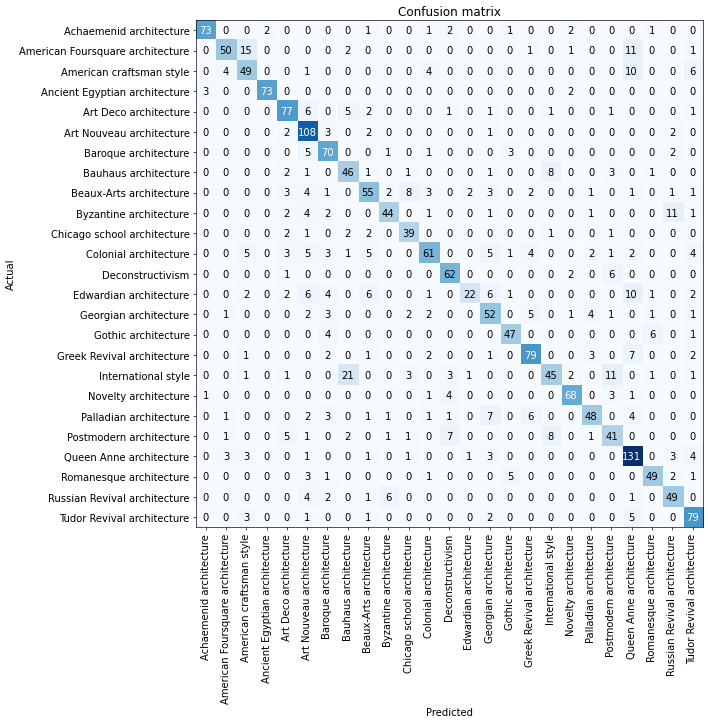

In [7]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [9]:
learn.export()